In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.load('faces_data.npy')

In [4]:
X.shape

(400, 64, 64)

In [5]:
mask = [True] * 400

In [6]:
mask[9::10] = [False]* 40

In [7]:
X_train = X[mask,:,:].reshape(360,-1).T

In [8]:
Mean_Face = np.mean(X[mask,:,:], axis = 0)

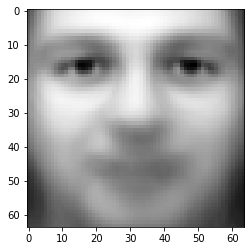

In [9]:
plt.imshow(Mean_Face, cmap='gray')

In [10]:
Mean_Face = Mean_Face.reshape(1,-1).T

In [11]:
X_train = X_train - Mean_Face

In [12]:
U, S, V = np.linalg.svd(X_train)

In [13]:
r = 5
U_r = U[:,:r]
S_r = S[:r]
V_r = V[:r,:]
W_r = np.diag(S_r).dot(V_r)
F_r = U_r.dot(W_r)

In [14]:
print(U.shape, S.shape, V.shape)

(4096, 4096) (360,) (360, 360)


In [15]:
Eigenface_1 = U[:,0].reshape(64, 64)
Eigenface_2 = U[:,1].reshape(64, 64)
Eigenface_3 = U[:,2].reshape(64, 64)
Eigenface_4 = U[:,3].reshape(64, 64)

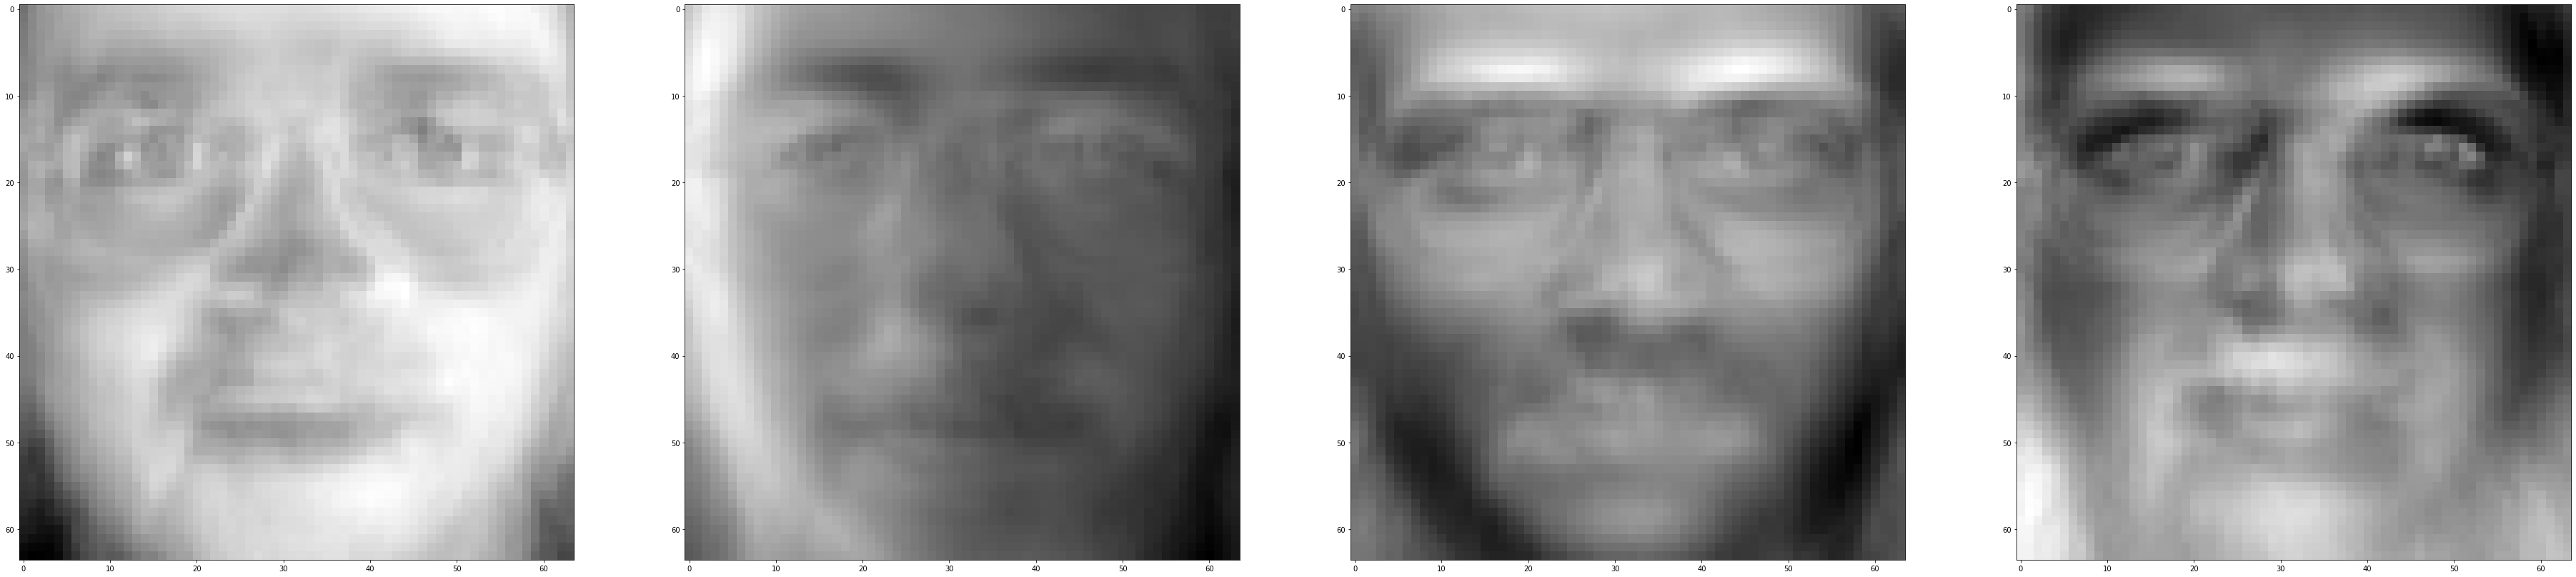

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(64,64))
ax1.imshow(Eigenface_1, cmap='gray')
ax2.imshow(Eigenface_2, cmap='gray')
ax3.imshow(Eigenface_3, cmap='gray')
ax4.imshow(Eigenface_4, cmap='gray')
plt.show()

In [48]:
X_test = X[~np.array(mask),:,:].reshape(40, -1).T - np.mean(X[~np.array(mask),:,:].reshape(40, -1).T, axis=1).reshape(-1, 1)

In [49]:
W_r.shape

(5, 360)

In [50]:
Coef_matrix = U_r.T.dot(X_test)

In [51]:
Coef_matrix.shape

(5, 40)

In [52]:
def cosine_sim(x, y):
    return x @ y / np.linalg.norm(x) / np.linalg.norm(y)

In [53]:
cos_matr = np.zeros((40, 360))
for j  in range(40):
    for i, vector in enumerate(W_r.T):
        cos_matr[j,i] = cosine_sim(vector, Coef_matrix[:, j])

In [72]:
(np.floor(np.argmax(cos_matr, axis=1) / 9).astype(int) == y_test).sum() / 40

0.55

In [56]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [57]:
knn = KNN(1, metric='cosine')

In [58]:
y_train = np.zeros(360, dtype=int)

In [59]:
for i in range(40):
    y_train[i * 9: (i + 1) * 9] += i

In [60]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 25

In [61]:
y_test = np.arange(40)

In [62]:
y_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [63]:
knn.fit(W_r.T, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
knn.predict(Coef_matrix.T)

array([ 9,  1,  9, 12,  5,  5, 35,  0, 37,  0, 10, 11, 22, 13, 34,  0, 12,
       17, 31, 19, 20, 21, 22, 23, 24, 24, 26, 27, 28, 29, 30, 31, 32, 33,
       39, 12, 36, 39, 38,  8])